In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upload and join datasets
control_df = pd.read_csv("control_group.csv", delimiter=";")
treatment_df = pd.read_csv("test_group.csv", delimiter=";")

market_df = pd.concat([control_df, treatment_df], axis=0)
market_df = market_df.reset_index()


In [3]:
market_df

,index,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [4]:
# Check for missing values.
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                60 non-null     int64  
 1   Campaign Name        60 non-null     object 
 2   Date                 60 non-null     object 
 3   Spend [USD]          60 non-null     int64  
 4   # of Impressions     59 non-null     float64
 5   Reach                59 non-null     float64
 6   # of Website Clicks  59 non-null     float64
 7   # of Searches        59 non-null     float64
 8   # of View Content    59 non-null     float64
 9   # of Add to Cart     59 non-null     float64
 10  # of Purchase        59 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.3+ KB


In [5]:
# Drop missing case.
market_df.drop(index=4, inplace=True)


In [6]:
# Rename variables for ease.
market_df.rename(columns={'index': 'Day', 'Campaign Name': 'Campaign', 'Spend [USD]': 'Spend', '# of Impressions': 'Impressions', '# of Website Clicks': 'Clicks', '# of Searches': 'Searches', '# of View Content': 'Content', '# of Add to Cart': 'Cart', '# of Purchase': 'Purchase'}, inplace=True)
market_df.describe()

,Day,Spend,Impressions,Reach,Clicks,Searches,Content,Cart,Purchase
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,14.677966,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,8.692924,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,0.000000,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,7.500000,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,15.000000,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,22.000000,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,29.000000,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


In [7]:
# Convert date into datetime variable in python for better manipulation.

import pandas as pd

Date = market_df['Date']

date_obj = pd.to_datetime(Date, dayfirst=True,format="mixed")

market_df['Date2'] = date_obj

In [8]:
# Importing LabelEncoder from Sklearn library from preprocessing Module.
# Change string variable of campaign into numeric variable.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
condition = le.fit_transform(market_df['Campaign'])
market_df["condition"] = condition

market_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          59 non-null     int64         
 1   Campaign     59 non-null     object        
 2   Date         59 non-null     object        
 3   Spend        59 non-null     int64         
 4   Impressions  59 non-null     float64       
 5   Reach        59 non-null     float64       
 6   Clicks       59 non-null     float64       
 7   Searches     59 non-null     float64       
 8   Content      59 non-null     float64       
 9   Cart         59 non-null     float64       
 10  Purchase     59 non-null     float64       
 11  Date2        59 non-null     datetime64[ns]
 12  condition    59 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 6.5+ KB


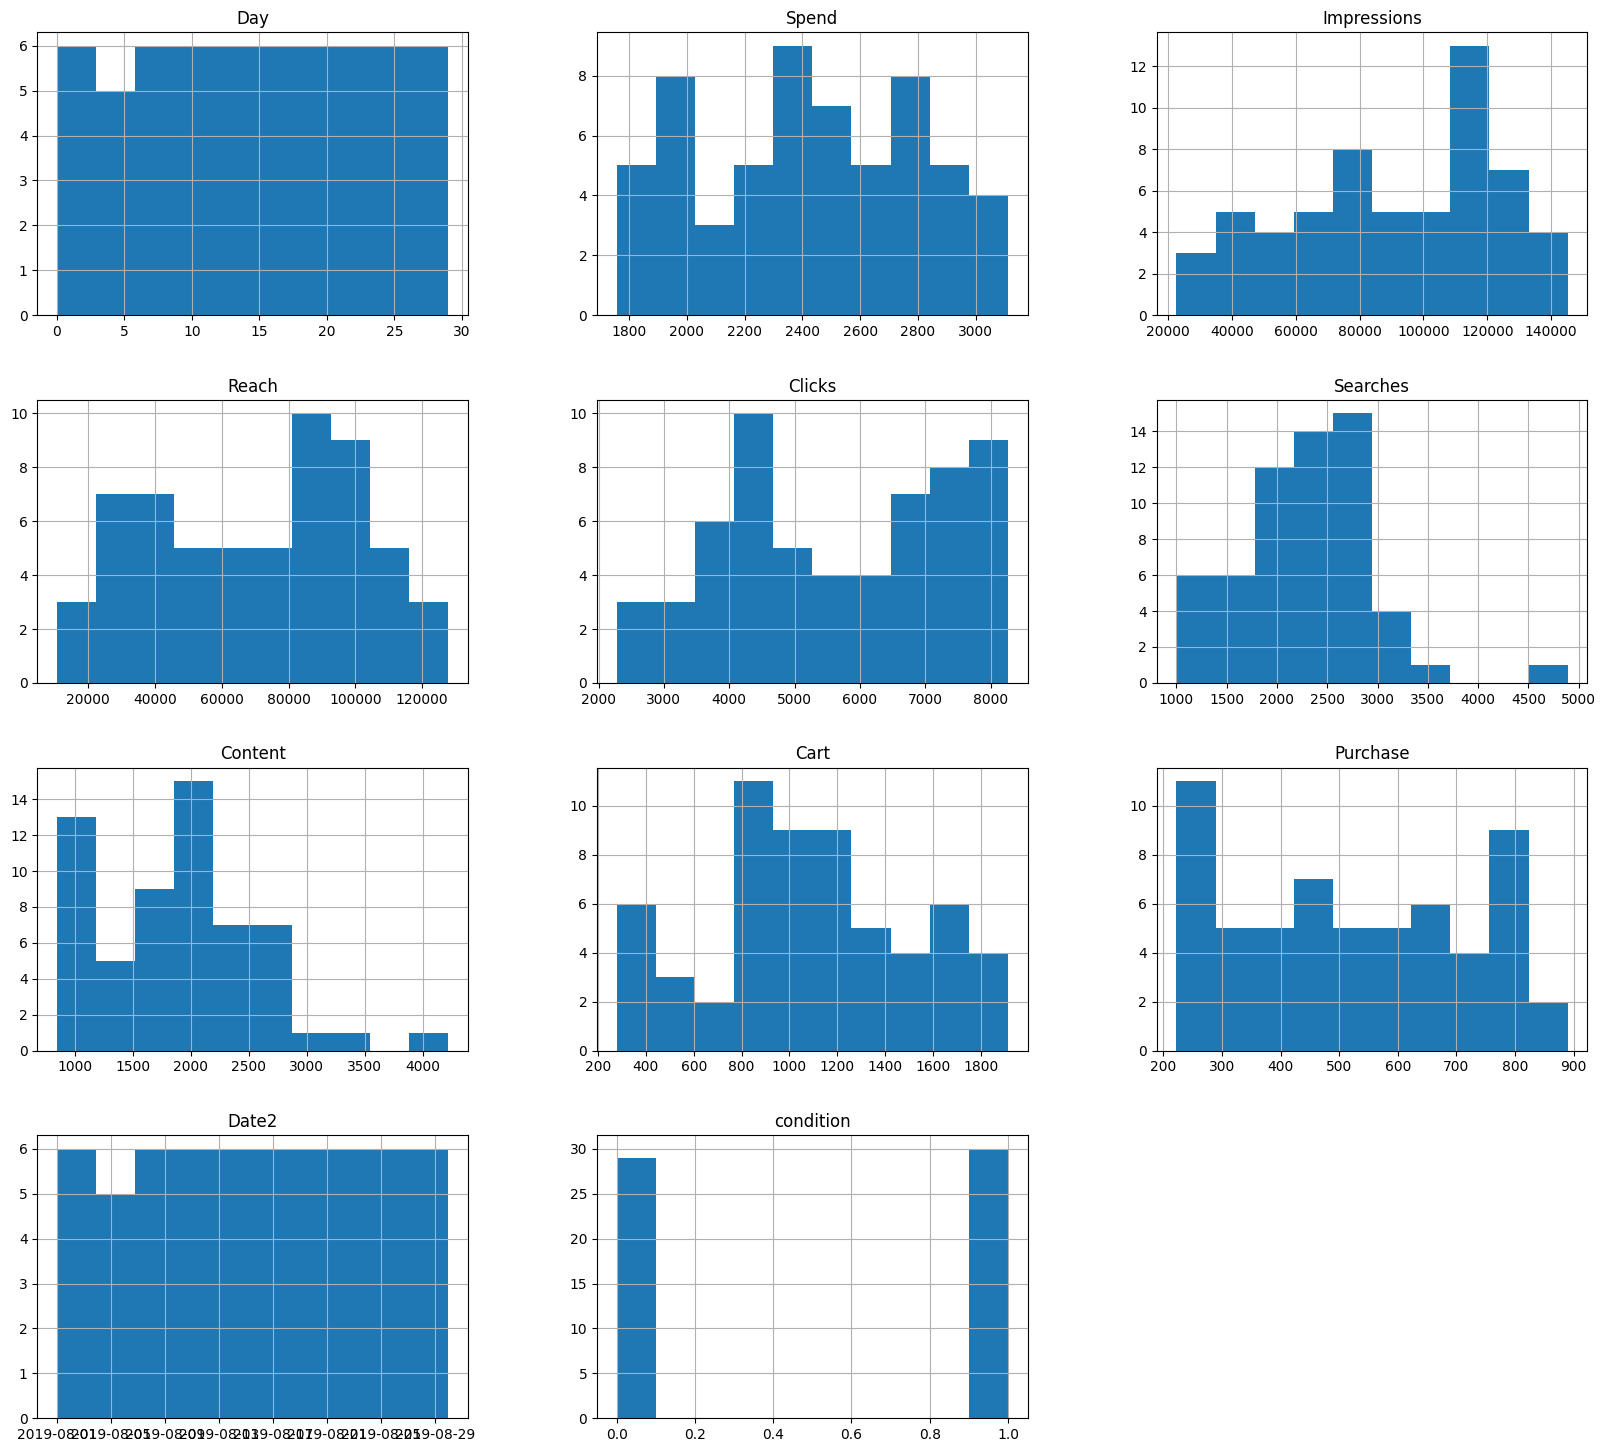

In [9]:
market_df.hist(figsize=(20, 18))  
plt.show()

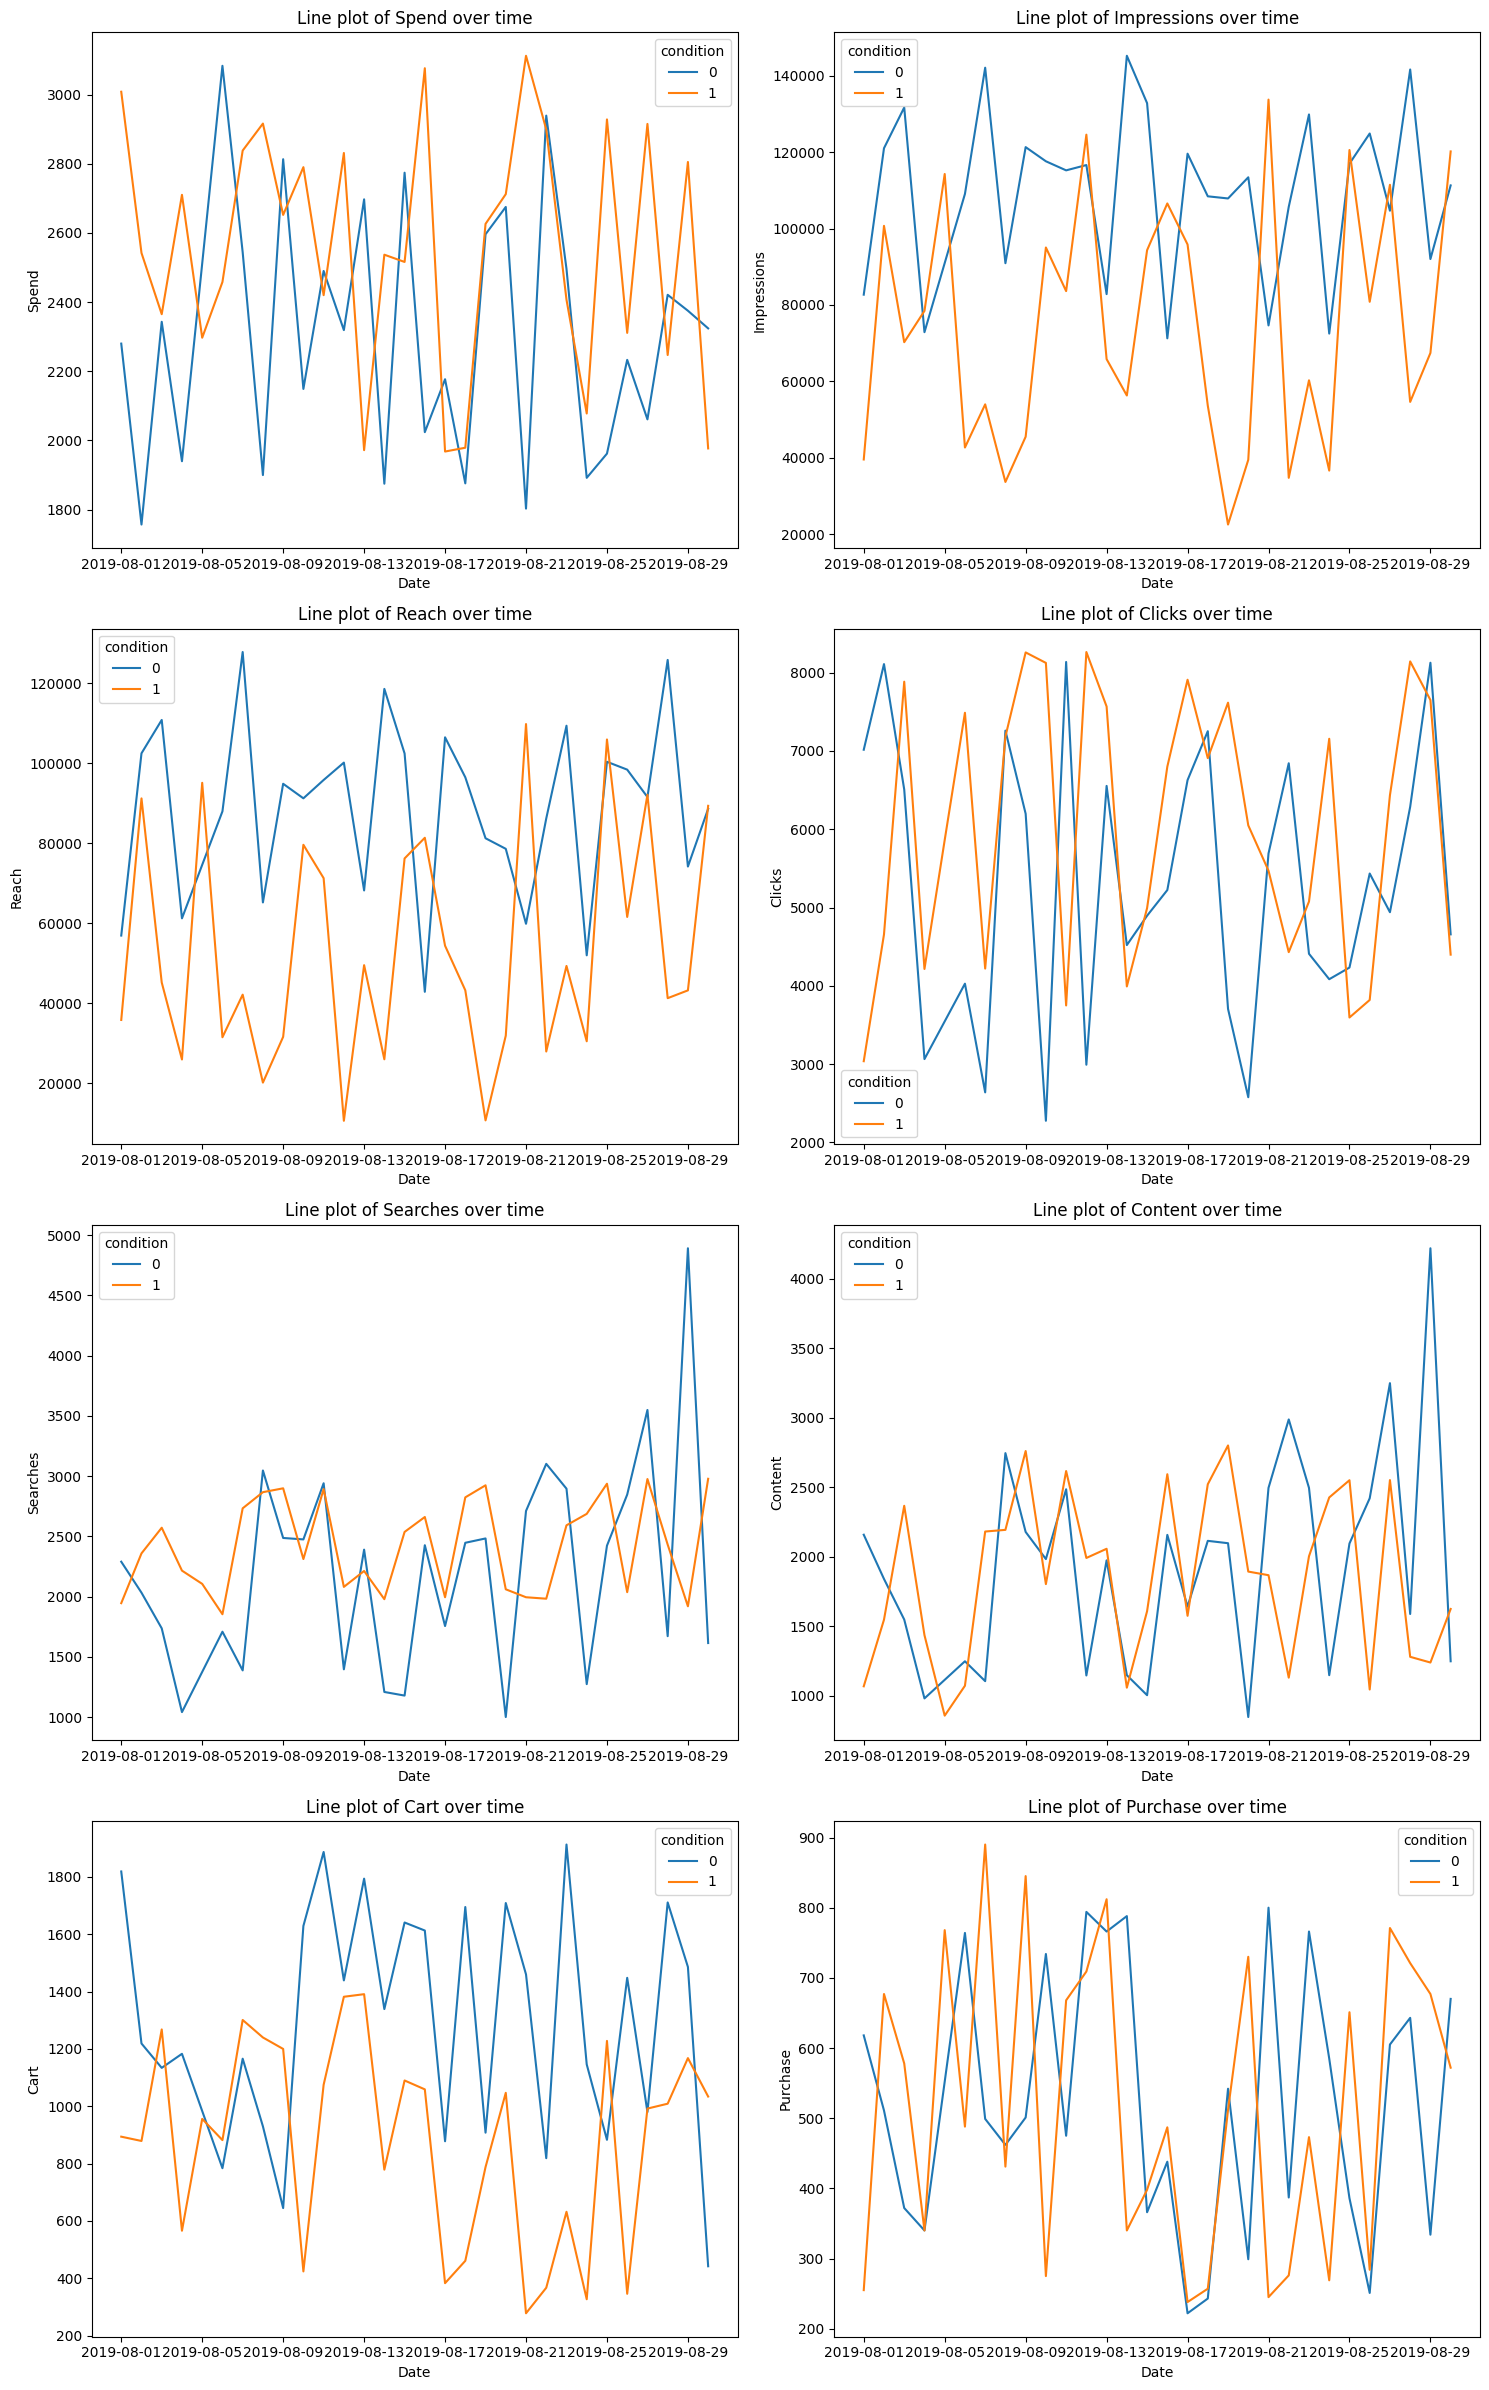

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the variables you're interested in
variables = ['Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Content', 'Cart', 'Purchase']

# Set up the figure with subplots in a horizontal layout
n_cols = 2  # Number of columns you want
n_rows = len(variables) // n_cols + (len(variables) % n_cols > 0)  # Number of rows, based on the number of variables

# Set up the figure with the right number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))

# Flatten axes array to easily index them
axes = axes.flatten()

# Loop through the variables and create a line plot for each
for i, var in enumerate(variables):
    sns.lineplot(data=market_df, x='Date2', y=var, hue='condition', ax=axes[i])
    axes[i].set_title(f'Line plot of {var} over time')
    axes[i].set_xlabel('Date')  # Add x-label for clarity
    axes[i].set_ylabel(var)     # Add y-label for clarity

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide empty subplots

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

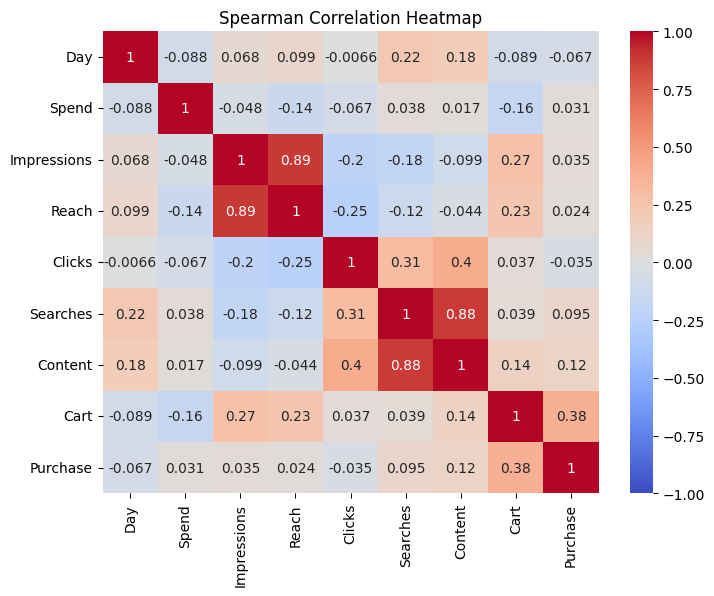

In [11]:
# Check for correlations among variables using Spearman Rank correlation coefficients.

outcome_df = market_df[['Day', 'Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Content', 'Cart', 'Purchase']]

spearman_corr_matrix = outcome_df.corr(method='spearman')

# Create heatmap to check correlations.
plt.figure(figsize=(8, 6))  
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()


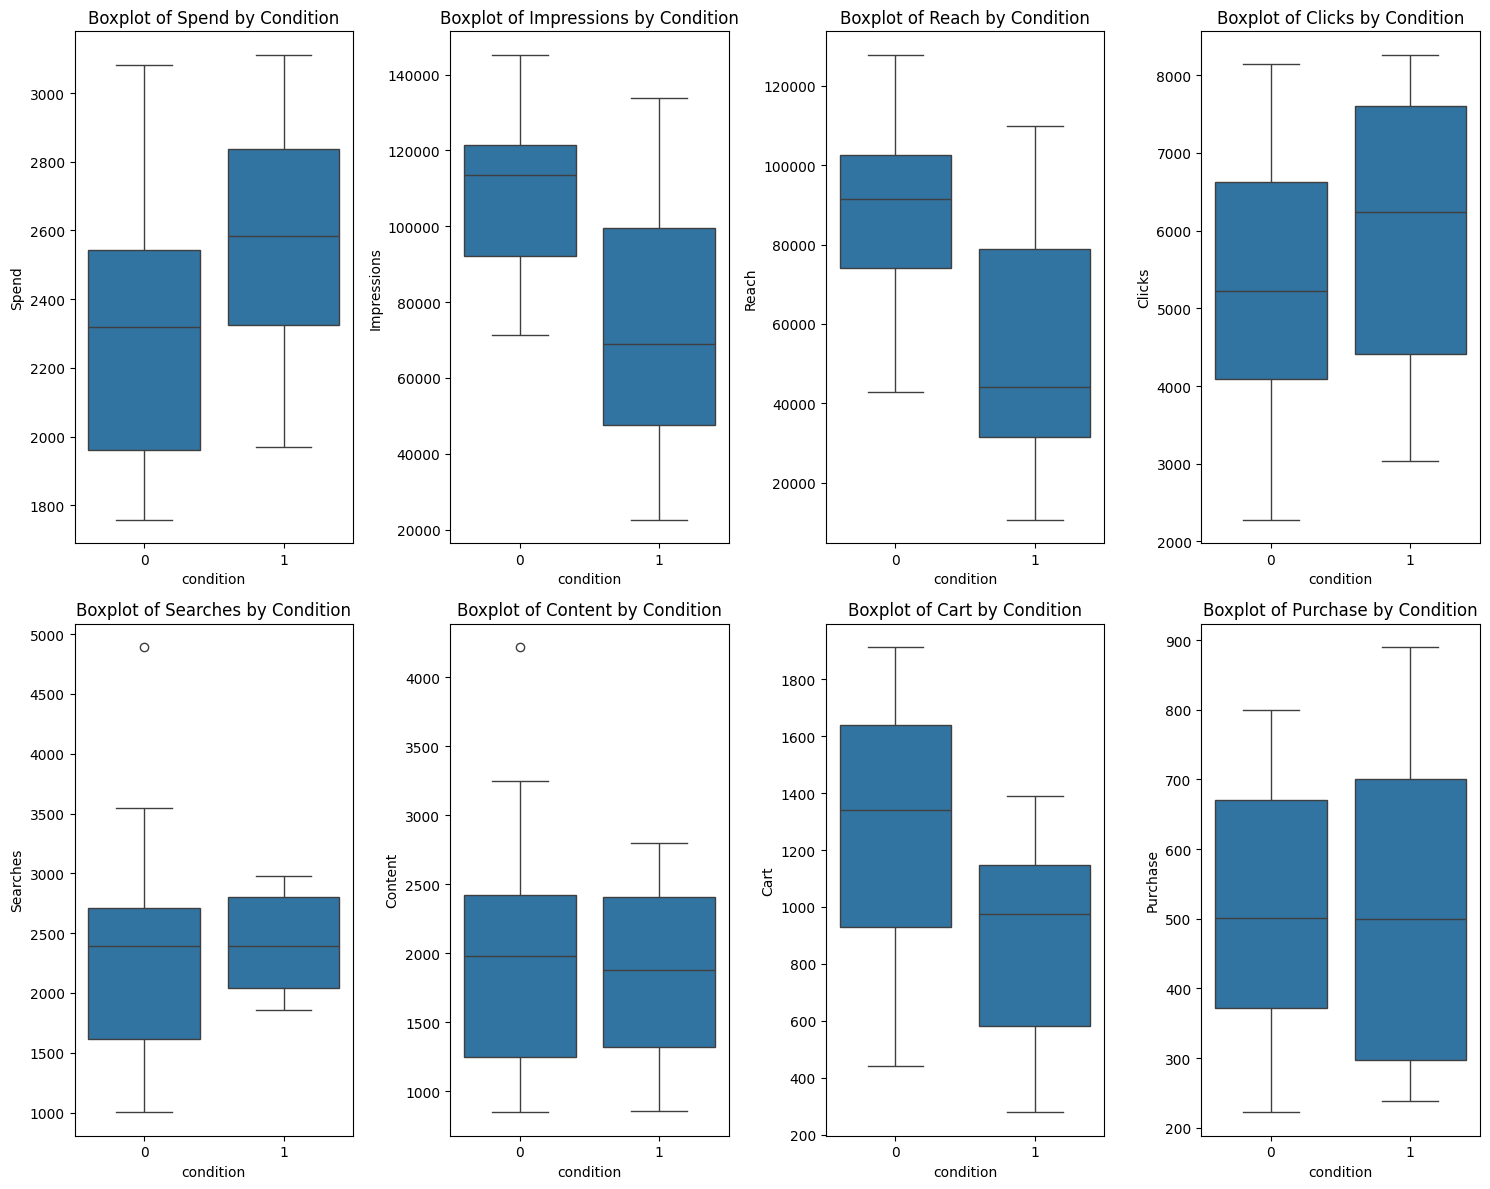

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the variables you're interested in
variables = ['Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Content', 'Cart', 'Purchase']

# Set up the figure with subplots in a horizontal layout
n_cols = 4  # Number of columns you want
n_rows = len(variables) // n_cols + (len(variables) % n_cols > 0)  # Number of rows, based on the number of variables

# Set up the figure with the right number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))

# Flatten axes array to easily index them
axes = axes.flatten()

# Loop through the variables and create a boxplot for each
for i, var in enumerate(variables):
    sns.boxplot(x="condition", y=var, data=market_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} by Condition')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide empty subplots

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()



In [13]:
# Look at medians by condition
medians_pivot = market_df.pivot_table(values=['Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Content', 'Cart', 'Purchase'], index='condition', aggfunc='median')
print("\nMedians by Category (using pivot_table()):\n", medians_pivot)


Medians by Category (using pivot_table()):
              Cart  Clicks  Content  Impressions  Purchase    Reach  Searches  \
condition                                                                      
0          1339.0  5224.0   1984.0     113430.0     501.0  91579.0    2390.0   
1           974.0  6242.5   1881.0      68853.5     500.0  44219.5    2395.5   

            Spend  
condition          
0          2319.0  
1          2584.0  


In [14]:
from scipy.stats import mannwhitneyu
# Group column and outcome columns
group_column = 'condition'
outcome_columns = ['Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Content', 'Cart', 'Purchase']

# Function to perform Mann-Whitney U test on multiple columns
def mann_whitney_multiple(market_df, group_column, outcome_columns):
    results = []
    
    # Loop through each outcome column
    for column in outcome_columns:
        # Split the data into two groups based on the group_column
        group_1 = market_df[market_df[group_column] == market_df[group_column].unique()[0]][column]
        group_2 = market_df[market_df[group_column] == market_df[group_column].unique()[1]][column]
        
        # Perform the Mann-Whitney U test
        stat, p_value = mannwhitneyu(group_1, group_2)
        
        # Append the result
        results.append({
            'Outcome': column,
            'U-Statistic': stat,
            'p-value': p_value
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Call the function to get results
results_df = mann_whitney_multiple(market_df, group_column, outcome_columns)

# Print the results
print(results_df)


       Outcome  U-Statistic   p-value
0        Spend        257.0  0.007119
1  Impressions        697.0  0.000073
2        Reach        719.0  0.000017
3       Clicks        337.0  0.139330
4     Searches        346.0  0.179644
5      Content        442.0  0.921490
6         Cart        664.0  0.000531
7     Purchase        439.0  0.957675


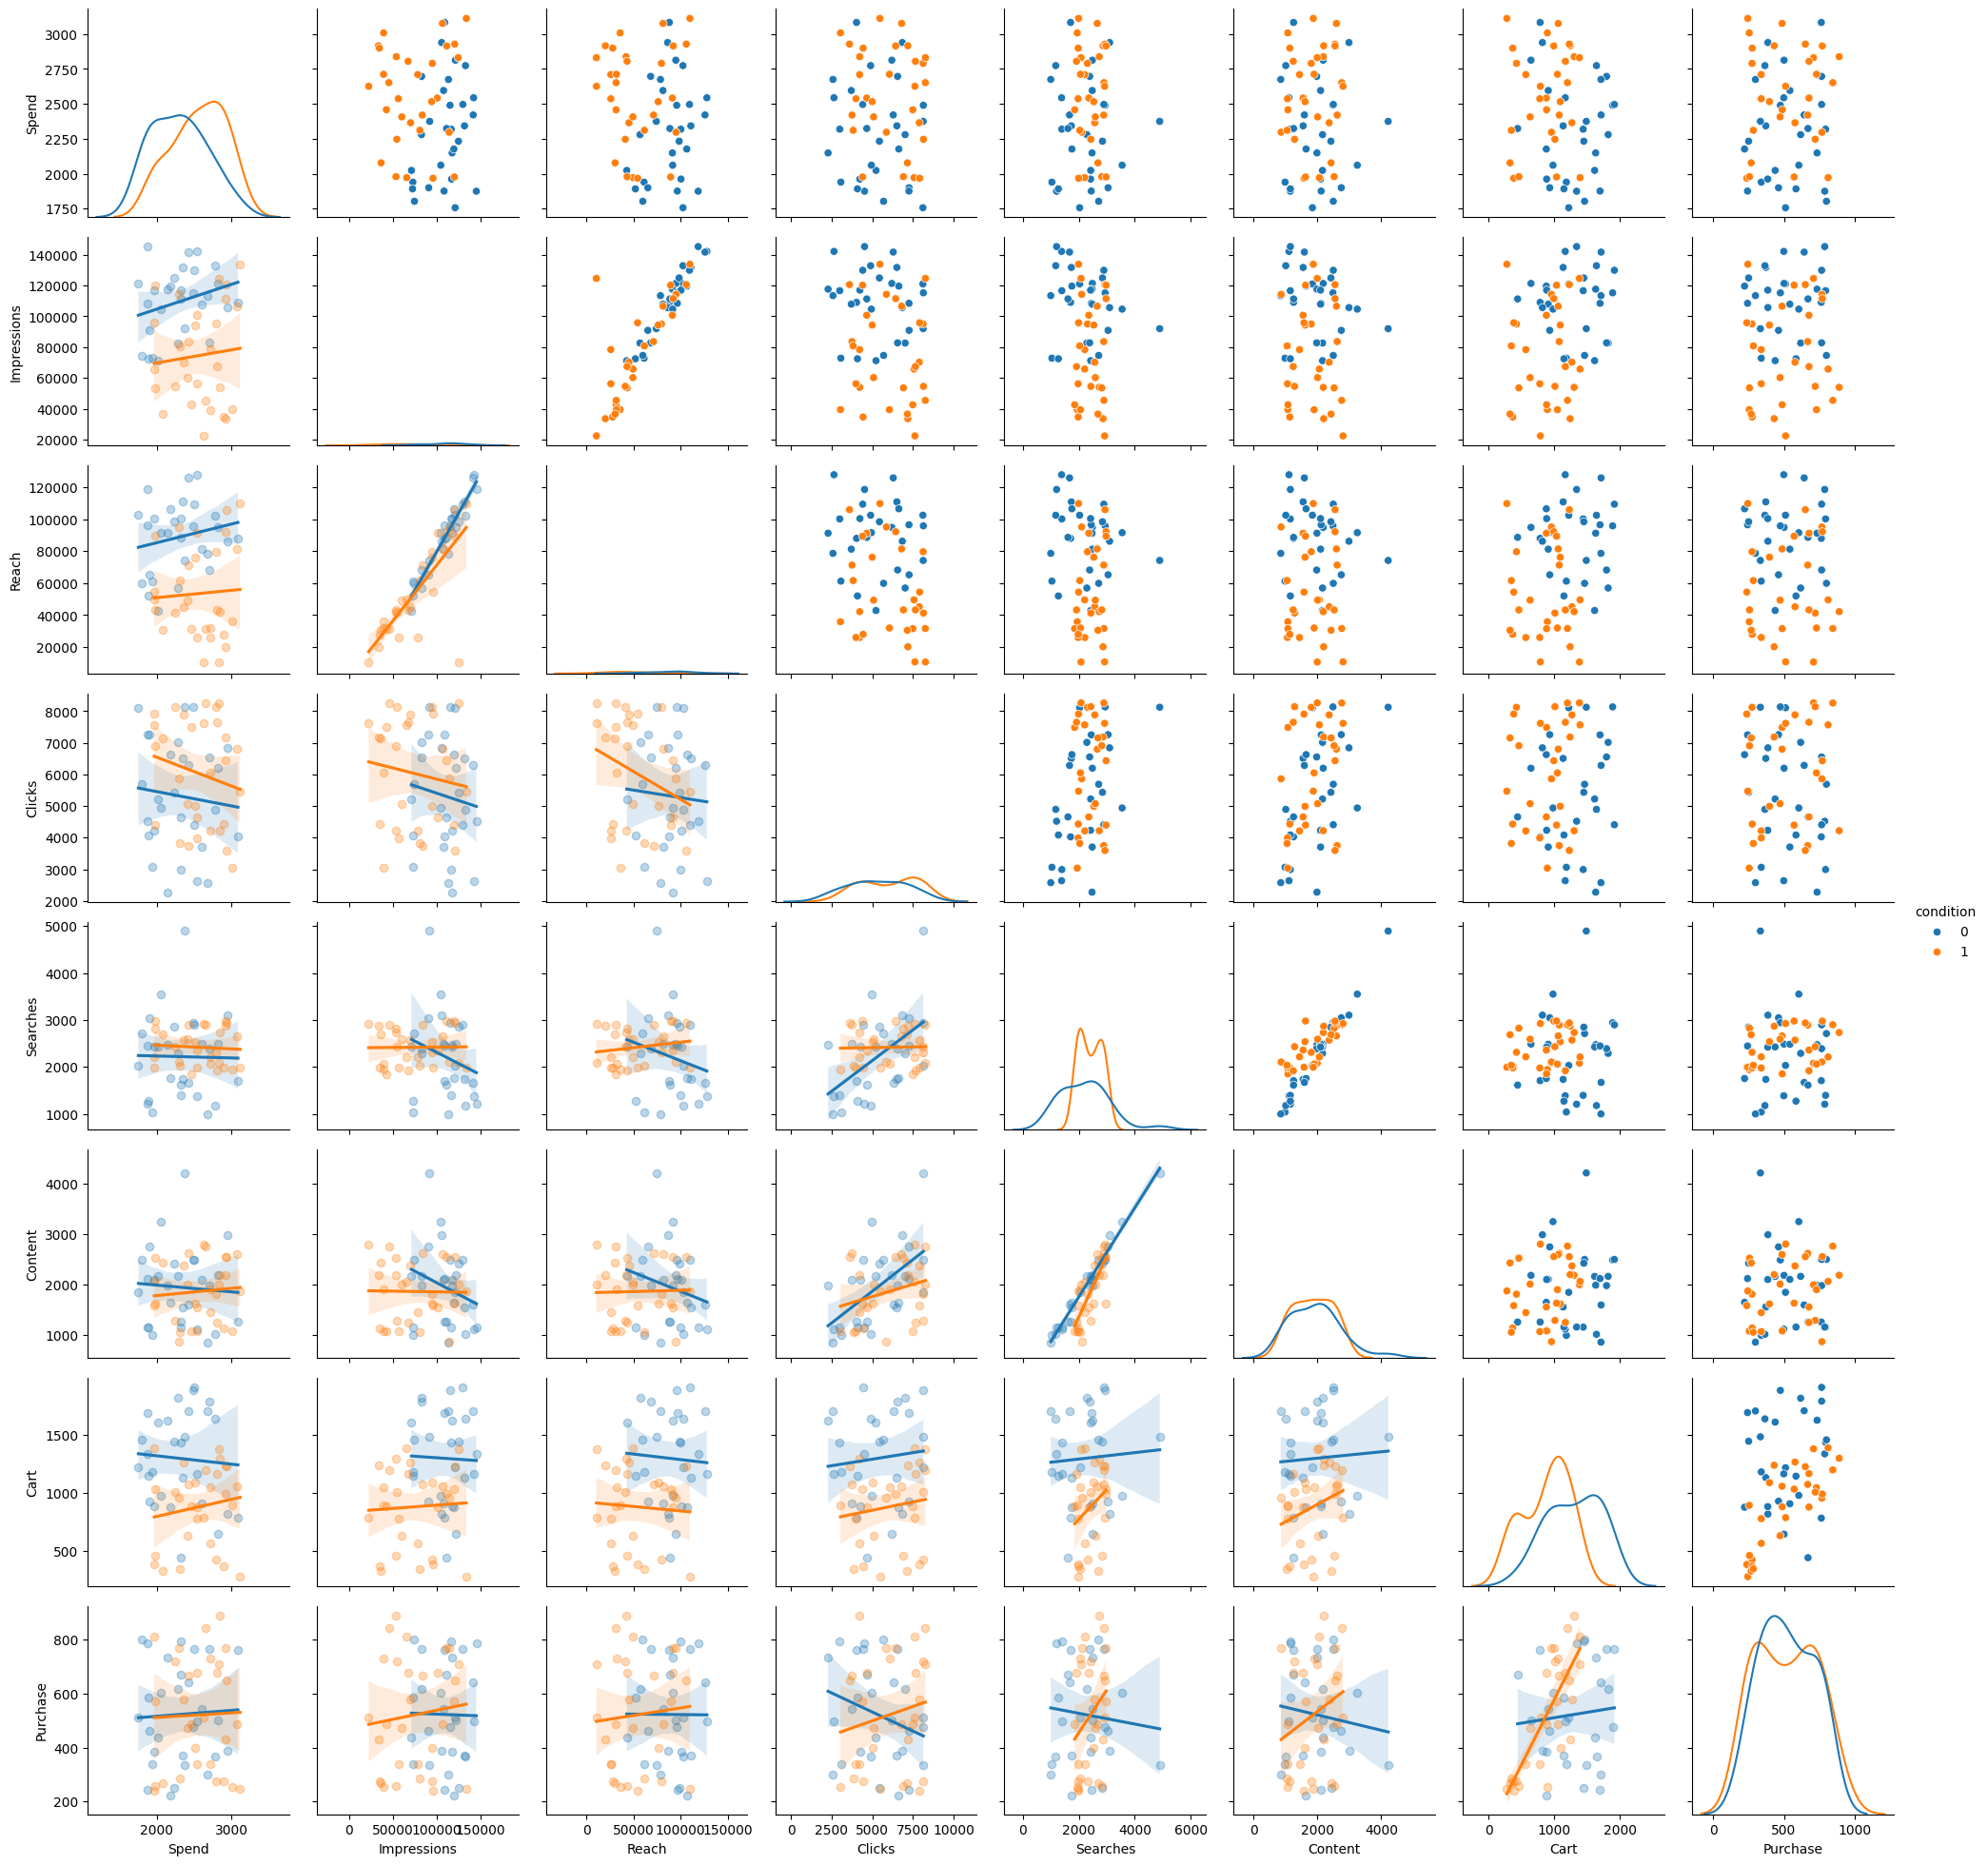

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

market2_df = market_df[['Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Content', 'Cart', 'Purchase', 'condition']]

# Create a PairGrid
g = sns.PairGrid(market2_df, hue='condition')

# Map regplot to the lower triangle
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.3})

# Map kdeplot to the diagonal
g.map_diag(sns.kdeplot)

# Map scatterplot to the upper triangle
g.map_upper(sns.scatterplot)

# Add a legend
g.add_legend()

# Show the plot
plt.show()

In [43]:
import statsmodels.api as sm

y = market_df['Purchase']
X = market_df[['condition', 'Cart']] 
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6.736
Date:                Mon, 17 Mar 2025   Prob (F-statistic):            0.00239
Time:                        10:24:13   Log-Likelihood:                -388.55
No. Observations:                  59   AIC:                             783.1
Df Residuals:                      56   BIC:                             789.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.0302     88.498      2.509      0.0